In [1]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2024-02-28 06:35:09--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-02-28 06:35:09 (23.2 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/76536e9/releases/pybind11-inst

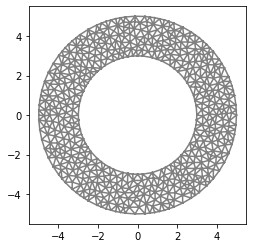

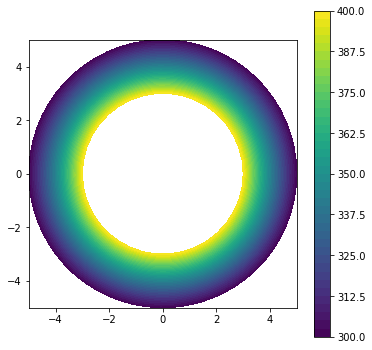

In [ ]:
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

#
%matplotlib inline
r_ex = 5.0
r_in = 3.0

domain = Circle(Point(0,0),r_ex)- Circle(Point(0,0),r_in)

#
mesh = generate_mesh(domain, 20)
plot(mesh)

V = FunctionSpace(mesh, 'P', 1)

#  Use the expression to define the boundary condition.
def circle_intern(x, on_boundary):
  r = sqrt(x[0]*x[0]+x[1]*x[1])
  return on_boundary and r < r_in*1.1

u1 = Constant(400.)
bc1 = DirichletBC(V, u1, circle_intern)

def circle_extern(x, on_boundary):
  r1 = sqrt(x[0]*x[0]+x[1]*x[1])
  return on_boundary and r1 > r_ex*0.9

u2 = Constant(300.)
bc2 = DirichletBC(V, u2, circle_extern)

# A list of boundary conditions for solve
bcs = [bc1, bc2]
#
#  Define the variational problem.
#
u = TrialFunction ( V )
v = TestFunction ( V )
#
f = Constant(0.0)
#
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx
#
#  Compute the solution.
#
uh = Function(V)
solve ( a == L, uh, bcs)


plt.figure(figsize=(6,6))
p = plot(uh)
plt.colorbar(p)
plt.show()

# Homework:

Solve the following boundary value problem:

\begin{eqnarray*}
- k \Delta T  =  f &    \text{ in } &\Omega,   \tag{4}\\
T = T_T, & \text{ on } & \Gamma_{top}, \tag{5}\\
T = T_B, & \text{ on } & \Gamma_{bottom}, \tag{6}\\
T = T_R, & \text{ on } &\Gamma_{right}  , \tag{7}\\
T = T_L, & \text{ on } &\Gamma_{left} , \tag{8}\\
T = T_{int}, & \text{ on } &\Gamma_{int}= \{(x,y)\in {\bf R}^2, x^2 + y^2 = 1/4 \}, \tag{9}
\end{eqnarray*}

with:
$$\Omega = [-1, 1] \times [-1, 1] - \{(x,y)\in {\bf R}^2, x^2 + y^2 < 1/4 \},$$


$$
k(x,y)=1,
$$

$$ f(x, y) = 10 e^{-((x - 0.5)^2 + (y - 0.5)^2) / 0.02} $$

and Dirichlet boundary conditions:
$$
T(x, y) = \begin{cases}
T_T = 300.0, & \text{ on } \Gamma_{top},\\
T_B = 300.0, & \text{ on } \Gamma_{bottom},\\
T_R = 300.0, & \text{ on } \Gamma_{right},\\
T_L = 300.0, & \text{ on } \Gamma_{left},\\
T_{int} = 400.0, & \text{ on } \Gamma_{int},
\end{cases},
$$

* The domain $\Omega$ is shown below::

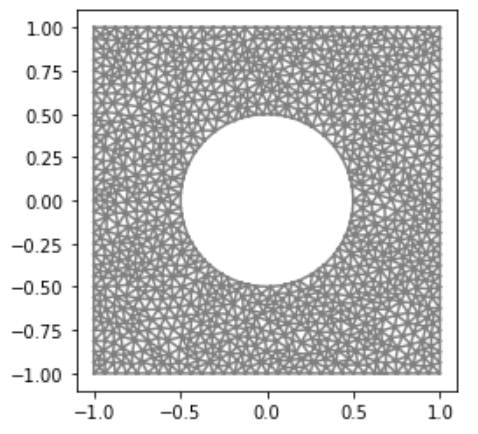

dim(Vh) =  538


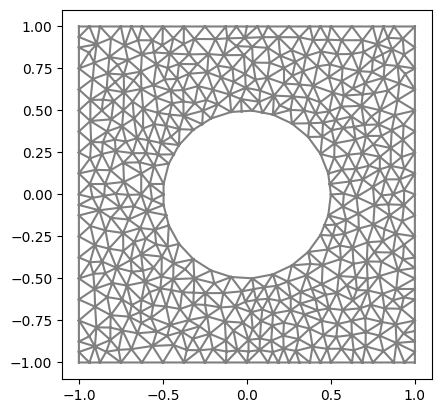

In [8]:
from dolfin import *
import matplotlib.pyplot as plt

# to plot the result in the Notebook
%matplotlib inline


from mshr import *
n = 10
d = 1

domain = Rectangle(Point(-1, -1), Point(1, 1)) - Circle(Point(0,0),0.5)

#
mesh = generate_mesh(domain, 20)
plot(mesh)

Vh  = FunctionSpace(mesh, 'Lagrange', d)
print ("dim(Vh) = ", Vh.dim())

In [9]:
#
#  Neumann boundary condition
#
class circle_intern(SubDomain):
  def inside(self, x, on_boundary):
    r = sqrt(x[0]*x[0]+x[1]*x[1])
    return on_boundary and r < 0.5*1.1

boundary_parts = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)

# mark the entire boundary as 0

boundary_parts.set_all(0)

# Mark the boundary as subdomain  1
Gamma_int = circle_intern()
Gamma_int.mark(boundary_parts, 1)


# Define the integration on boundary
ds = Measure("ds", domain=mesh, subdomain_data=boundary_parts)

In [10]:
#
#  Define Dirichlet boundary conditions
#
def top(x, on_boundary):
  return on_boundary and near(x[1], 1.0)

u2 = Constant(300.)
bc2 = DirichletBC(Vh, u2, top)

def bot(x, on_boundary):
  return on_boundary and near(x[1], -1.0)

bc3 = DirichletBC(Vh, u2, bot)


def right(x, on_boundary):
  return on_boundary and near(x[0], 1.0)

bc4 = DirichletBC(Vh, u2, right)

def left(x, on_boundary):
  return on_boundary and near(x[0], -1.0)

bc5 = DirichletBC(Vh, u2, left)
# A list of boundary conditions for solve
bcs = [bc2, bc3,bc4,bc5]

$$ f(x, y) = 10 e^{-((x - 0.5)^2 + (y - 0.5)^2) / 0.02} $$

In [11]:
#
# Volume load
#
f = Expression('10*exp((-pow(x[0]-0.5,2)-pow(x[1]-0.5,2))/0.02)', degree=d+2)

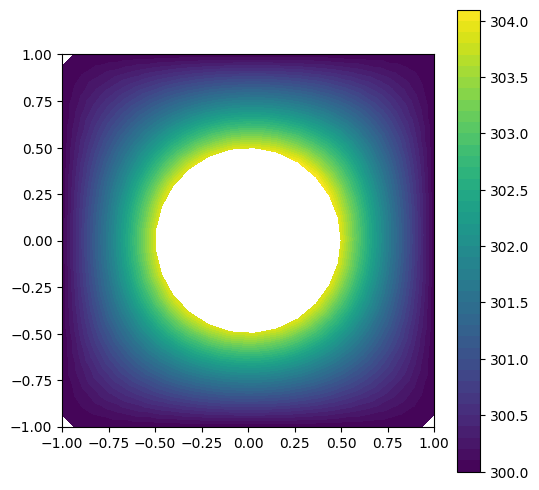

In [13]:
#
#    Surface load
#
g = Constant(10.)
#
#  Define the variational problem.
#
u = TrialFunction ( Vh )
v = TestFunction ( Vh )

#
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx + g*v*ds(1)
#
#  Compute the solution.
#
uh = Function(Vh)
solve ( a == L, uh, bcs)


plt.figure(figsize=(6,6))
p = plot(uh)
plt.colorbar(p)
plt.show()